In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import csv
import janitor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# sample list
mapping_16S = pd.read_csv("~/Documents/thesis/16S/qiime2/mappingfiles/16S_mapping.csv")
mapping_16S.head()

,#SampleID,Mother_Child,SubjectID,MaternalID,TimePoint,Mgx_batch Mapping,16S_batch Mapping
0,C0052-5F-1A,C,52,0052_m,5,Mgx_batch001,16S_batch001
1,C0126-8F-1A,C,126,0126_m,8,Mgx_batch001,16S_batch001
2,C0126-8F-1B,C,126,0126_m,8,Mgx_batch001,16S_batch001
3,C0127-6F-1B,C,127,0127_m,6,Mgx_batch001,16S_batch001
4,C0286-5F-1A,C,286,0286_m,5,Mgx_batch001,16S_batch001


In [3]:
samplenames = list(mapping_16S["#SampleID"])

In [4]:
# read in mgx data
mgx = pd.read_csv("mgx_genera.csv")
mgx.rename(columns={'Taxon':'taxa'}, inplace=True)
mgx.head()


,taxa,C0052-5F-1A,C0126-8F-1A,C0126-8F-1B,C0127-6F-1B,C0286-5F-1A,C0296-5F-1A,C0053-6F-1A,C0108-4F-1A,C0498-1F-2A,...,M1116-1F-1A,C0828-4F-1A,C1062-3F-1A,M1082-1F-1A,C0461-4F-1A,M1110-1F-1A,C0388-7F-1A,M1088-1F-1A,C1089-1F-1A,M1109-1F-1A
0,Acidaminococcaceae_unclassified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
1,Acidaminococcus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.002632,0.0,0.0,0.000000,0.03501,0.0,0.0
2,Acinetobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
3,Actinobacillus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000139,0.000000,0.0,0.0,0.000116,0.00000,0.0,0.0
4,Actinobaculum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0


In [5]:
# remove taxa that are unclassified or have no name
# "_unclassified"
# "_noname"
mgx = mgx[~mgx.taxa.str.contains("_unclassified")]
mgx = mgx[~mgx.taxa.str.contains("_noname")]

In [6]:
mgx.head()

,taxa,C0052-5F-1A,C0126-8F-1A,C0126-8F-1B,C0127-6F-1B,C0286-5F-1A,C0296-5F-1A,C0053-6F-1A,C0108-4F-1A,C0498-1F-2A,...,M1116-1F-1A,C0828-4F-1A,C1062-3F-1A,M1082-1F-1A,C0461-4F-1A,M1110-1F-1A,C0388-7F-1A,M1088-1F-1A,C1089-1F-1A,M1109-1F-1A
1,Acidaminococcus,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.002632,0.0,0.0,0.000000,0.03501,0.0,0.0
2,Acinetobacter,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
3,Actinobacillus,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000139,0.000000,0.0,0.0,0.000116,0.00000,0.0,0.0
4,Actinobaculum,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
5,Actinomyces,0.0,0.0,0.0,0.0,0.0,0.000049,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0


In [7]:
# read in 16S data
amplicon = pd.read_csv("feature-table.csv")
amplicon.rename(columns={'#OTU ID':'taxa'}, inplace=True)


In [8]:
# clean taxonomic names
# keep only genera
amplicon["taxa"] = amplicon['taxa'].str.split("D_5__", expand=True)[1]
amplicon.dropna(inplace=True)


In [9]:
amplicon.head()

,taxa,C0047-7E-1A,C0052-7E-1A,C0053-8E-1A,C0058-4E-1A,C0059-4E-1A,C0106-6E-1A,C0107-4E-1A,C0123-3E-1A,C0126-9E-1A,...,M1087-1F-1A,M1088-1F-1A,M1095-1F-1A,M1096-1F-1A,M1099-1F-1A,M1109-1F-1A,M1110-1F-1A,M1113-1F-1A,M1115-1F-1A,M1116-1F-1A
0,Methanobrevibacter,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19,0,0,0
7,Subgroup 10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Subgroup 23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Ilumatobacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Actinomyces,0,0,7,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
amplicon.sort_values(by = "taxa", ascending=True, inplace=True)

In [11]:
amplicon["taxa"] = amplicon["taxa"].astype(str)

In [12]:
# remove any Nones, uncultured organisms
amplicon = amplicon[~amplicon.taxa.str.contains("uncultured")]
amplicon = amplicon[~amplicon.taxa.str.contains("metagenome")]
amplicon = amplicon[~amplicon.taxa.str.contains("unidentified")]
amplicon = amplicon[~amplicon.taxa.str.contains(r'[0-9]')]
amplicon = amplicon[~amplicon.taxa.str.contains("group")]

In [13]:
# calculate relative abundances
bug_sum = amplicon.sum(axis = 0, skipna = True)
amplicon.iloc[:, 1:] = amplicon.iloc[:, 1:]/bug_sum

In [61]:
amplicon.to_csv('16S_abundance.csv')

### looking for the intersection of taxonomy

In [14]:
# calculate number of taxa in both vs. either one

In [15]:
amplicon_taxa_list = set(amplicon["taxa"])
mgx_taxa_list = set(mgx["taxa"])

In [16]:
intersection = [bug for bug in amplicon_taxa_list if bug in mgx_taxa_list]

def union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

union = union(list(set(amplicon_taxa_list)), list(set(mgx_taxa_list)))


In [53]:
union_df = pd.DataFrame(union)
union_df["sampling"]

In [55]:
union_df.head()

,0
0,Parvimonas
1,Epulopiscium
2,Massilia
3,Candidatus Udaeobacter
4,Mastadenovirus


In [ ]:
union_df.to_csv('taxalist.csv', index=False)

len(intersection)
len(amplicon_taxa_list)-len(intersection)
len(mgx_taxa_list)-len(intersection)

In [18]:
amplicon_only = [bug for bug in amplicon_taxa_list if bug not in intersection]
mgx_only = [bug for bug in mgx_taxa_list if bug not in intersection]


### creating long-form dataframe with data from both sequencing methods

In [19]:
amplicon.head()

,taxa,C0047-7E-1A,C0052-7E-1A,C0053-8E-1A,C0058-4E-1A,C0059-4E-1A,C0106-6E-1A,C0107-4E-1A,C0123-3E-1A,C0126-9E-1A,...,M1087-1F-1A,M1088-1F-1A,M1095-1F-1A,M1096-1F-1A,M1099-1F-1A,M1109-1F-1A,M1110-1F-1A,M1113-1F-1A,M1115-1F-1A,M1116-1F-1A
245,Acetanaerobacterium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,Acetobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,Acholeplasma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,Achromobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,Acidaminococcus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011094,0.009139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
mgx_unique = [sample for sample in list(mgx.columns.values) if sample not in list(amplicon.columns.values)] 
amplicon_unique = [sample for sample in list(amplicon.columns.values) if sample not in list(mgx.columns.values)]


mgx.drop(mgx_unique, axis=1, inplace=True)
amplicon.drop(amplicon_unique, axis=1, inplace=True)

In [21]:
len(mgx.columns.values)

262

In [22]:
len(amplicon.columns.values)

262

In [23]:
amplicon_melt = pd.melt(amplicon, id_vars=["taxa"], var_name = "sampleid", value_name = "amplicon_abund")

In [24]:
mgx_melt = pd.melt(mgx, id_vars=["taxa"], var_name = "sampleid", value_name = "mgx_abund")

In [25]:
mgx_melt.head()

,taxa,sampleid,mgx_abund
0,Acidaminococcus,M0652-1F-1A,0.0
1,Acinetobacter,M0652-1F-1A,0.0
2,Actinobacillus,M0652-1F-1A,0.0
3,Actinobaculum,M0652-1F-1A,0.0
4,Actinomyces,M0652-1F-1A,0.0


In [26]:
amplicon_melt.head()

,taxa,sampleid,amplicon_abund
0,Acetanaerobacterium,C0047-7E-1A,0.0
1,Acetobacter,C0047-7E-1A,0.0
2,Acholeplasma,C0047-7E-1A,0.0
3,Achromobacter,C0047-7E-1A,0.0
4,Acidaminococcus,C0047-7E-1A,0.0


In [27]:
merged_taxa = pd.merge(amplicon_melt, mgx_melt, on = ["sampleid", "taxa"], how = "outer")

In [28]:
merged_taxa["abs_diff"] = abs(merged_taxa["amplicon_abund"] - merged_taxa["mgx_abund"])
merged_taxa["tot_diff"] = (merged_taxa["amplicon_abund"] - merged_taxa["mgx_abund"])

In [29]:
merged_taxa.sample(10)

,taxa,sampleid,amplicon_abund,mgx_abund,abs_diff,tot_diff
40877,Catabacter,M0801-1E-1A,0.000000,NaN,NaN,NaN
62960,Anaeroplasma,M1115-1F-1A,0.000000,NaN,NaN,NaN
5784,Raoultella,C0494-2E-1A,0.000000,0.000000,0.00000,0.00000
3624,Subdoligranulum,C0286-6E-1A,0.003153,0.002573,0.00058,0.00058
24461,Negativibacillus,M0647-1F-1A,0.000000,NaN,NaN,NaN
52515,Anaerovibrio,M0996-2F-1A,0.000000,NaN,NaN,NaN
12988,Granulosicoccus,C0711-4F-1A,0.000000,NaN,NaN,NaN
68570,Corynebacterium,M0801-1E-1A,NaN,0.000000,NaN,NaN
19187,Tyzzerella,C0825-1E-1A,0.000000,NaN,NaN,NaN
49265,Parvimonas,M0950-2F-1A,0.000000,0.000000,0.00000,0.00000


In [30]:
merged_taxa.to_csv('taxa_abundance_comparison.csv')

In [31]:
len(mgx_only)
len(amplicon_only)

59

159

<BarContainer object of 2 artists>

Text(0, 0.5, 'number of organisms')

Text(0.5, 1.0, 'Genera found by metagenomic and 16S rRNA sequencing')

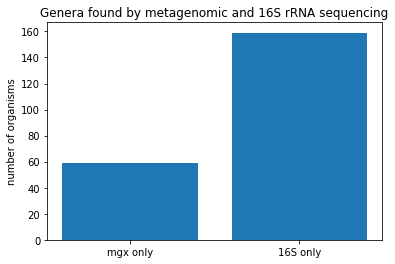

In [32]:
tick_label = ['mgx only', '16S only']
x = [1, 2]
value = [len(mgx_only), len(amplicon_only)]
plt.bar(x, value, tick_label = tick_label)
plt.ylabel('number of organisms')
plt.title('Genera found by metagenomic and 16S rRNA sequencing') 
plt.savefig('taxapickedup')

In [33]:
# number of samples where there is one bug picked up by 16S and not mgx

rare_16s = merged_taxa[(merged_taxa.amplicon_abund > 0.0) & (merged_taxa.mgx_abund == 0.0)]
samples_rare_16s = (set(rare_16s["sampleid"]))
num_16s_rare_samples = len(samples_rare_16s)

rare_mgx = merged_taxa[(merged_taxa.mgx_abund > 0.0) & (merged_taxa.amplicon_abund == 0.0)]
samples_rare_mgx = (set(rare_mgx["sampleid"]))
num_mgx_rare_samples = len(samples_rare_mgx)


In [34]:
display(num_16s_rare_samples)
display(num_mgx_rare_samples)

259

258

<BarContainer object of 2 artists>

Text(0, 0.5, 'number of samples')

Text(0.5, 1.0, 'Samples where > 1 bug found by only method')

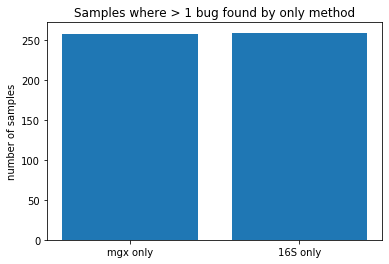

In [35]:
x = [1, 2]
value = [num_mgx_rare_samples, num_16s_rare_samples ]
tick_label = ['mgx only', '16S only']
plt.bar(x, value, tick_label = tick_label)
plt.ylabel('number of samples')
plt.title('Samples where > 1 bug found by only method') 

    
plt.savefig('samples_rarebugs')

In [36]:
rare_mgx_taxa = rare_mgx["taxa"]
rare_16s_taxa = rare_16s["taxa"]

In [37]:
len(rare_mgx_taxa)
len(rare_16s_taxa)

923

1456

<BarContainer object of 2 artists>

Text(0, 0.5, 'number of total bugs')

Text(0.5, 1.0, 'Number of total times when 1 bug found by only method')

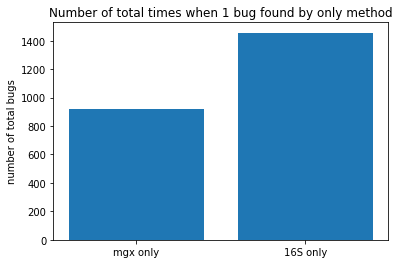

In [38]:
x = [1, 2]
value = [len(rare_mgx_taxa), len(rare_16s_taxa)]
tick_label = ['mgx only', '16S only']
plt.bar(x, value, tick_label = tick_label)
plt.ylabel('number of total bugs')
plt.title('Number of total times when 1 bug found by only method') 

    
plt.savefig('total_rarebugs')

In [39]:
merged_taxa.head()

,taxa,sampleid,amplicon_abund,mgx_abund,abs_diff,tot_diff
0,Acetanaerobacterium,C0047-7E-1A,0.0,NaN,NaN,NaN
1,Acetobacter,C0047-7E-1A,0.0,NaN,NaN,NaN
2,Acholeplasma,C0047-7E-1A,0.0,NaN,NaN,NaN
3,Achromobacter,C0047-7E-1A,0.0,NaN,NaN,NaN
4,Acidaminococcus,C0047-7E-1A,0.0,0.0,0.0,0.0


In [40]:
# calculating percentage of bugs present uniquely in mgx, 16S, or both by sample

In [41]:
# def calc_perc_method(df):
#     amplicon = sum(df.query('df["amplicon_abund"] > 0 & math.isnan(df["mgx_abund"]'')))
#     mgx = sum(df.query('df["mgx_abund"] > 0 & math.isnan(df["amplicon_abund"]'')))
#     both = sum(df.query('df["amplicon_abund"] > 0 & df["mgx_abund"] > 0'))
            
#     return amplicon, mgx, both

In [42]:
amplicon_avg_abund = merged_taxa.groupby("taxa")["amplicon_abund"].mean()
mgx_avg_abund = merged_taxa.groupby("taxa")["mgx_abund"].mean()
taxa_list = sorted(set(merged_taxa["taxa"]))

In [43]:
mean_taxa_abund = pd.DataFrame(
    (zip(taxa_list, amplicon_avg_abund, mgx_avg_abund)),  
    columns = ['taxa','amp_avg_abund', 'mgx_avg_abund'])

In [44]:
mean_taxa_abund["abs_diff"] = abs(mean_taxa_abund["amp_avg_abund"] - mean_taxa_abund["mgx_avg_abund"])
mean_taxa_abund["total_diff"] = mean_taxa_abund["amp_avg_abund"] - mean_taxa_abund["mgx_avg_abund"]


In [45]:
mean_taxa_abund.sort_values("abs_diff", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')

In [56]:
mean_taxa_abund.sample(10)

,taxa,amp_avg_abund,mgx_avg_abund,abs_diff,total_diff
112,Facklamia,NaN,0.000000e+00,NaN,NaN
63,Chlorobium,0.000162,NaN,NaN,NaN
285,Thiogranum,0.000041,NaN,NaN,NaN
32,Angelakisella,0.000200,NaN,NaN,NaN
175,Lutimonas,0.000019,NaN,NaN,NaN
263,Senegalimassilia,0.000080,NaN,NaN,NaN
256,Saccharomyces,NaN,2.291188e-07,NaN,NaN
300,Woeseia,0.000023,NaN,NaN,NaN
220,Peptococcus,0.000588,NaN,NaN,NaN
180,Marinifilum,0.000009,NaN,NaN,NaN


In [47]:
mean_taxa_abund.to_csv('taxa_difference.csv')

In [48]:
# selecting taxa with largest difference
large_diff_taxa = mean_taxa_abund.iloc[:10,]
large_diff_taxa

,taxa,amp_avg_abund,mgx_avg_abund,abs_diff,total_diff
116,Finegoldia,0.000009,9.570117e-06,1.143988e-07,-1.143988e-07
95,Dysgonomonas,0.000001,1.620690e-06,3.471133e-07,-3.471133e-07
7,Actinobacillus,0.000005,6.006897e-06,1.477558e-06,-1.477558e-06
46,Brevundimonas,0.000004,6.570882e-07,3.202449e-06,3.202449e-06
234,Proteus,0.000007,1.094176e-05,4.021744e-06,-4.021744e-06
213,Pantoea,0.000005,0.000000e+00,5.055116e-06,5.055116e-06
193,Morganella,0.000007,1.285249e-05,5.394488e-06,-5.394488e-06
298,Weissella,0.000007,1.107280e-06,5.735904e-06,5.735904e-06
222,Peptostreptococcus,0.000016,2.252989e-05,6.627543e-06,-6.627543e-06
34,Atopobium,0.000005,1.153640e-05,6.854266e-06,-6.854266e-06


In [49]:
large_diff_merged = pd.merge(merged_taxa, large_diff_taxa, on = ["taxa"], how = "inner")

In [50]:
large_diff_merged

,taxa,sampleid,amplicon_abund,mgx_abund,abs_diff_x,tot_diff,amp_avg_abund,mgx_avg_abund,abs_diff_y,total_diff
0,Actinobacillus,C0047-7E-1A,0.0,0.0,0.0,0.0,0.000005,0.000006,0.000001,-0.000001
1,Actinobacillus,C0052-7E-1A,0.0,0.0,0.0,0.0,0.000005,0.000006,0.000001,-0.000001
2,Actinobacillus,C0053-8E-1A,0.0,0.0,0.0,0.0,0.000005,0.000006,0.000001,-0.000001
3,Actinobacillus,C0058-4E-1A,0.0,0.0,0.0,0.0,0.000005,0.000006,0.000001,-0.000001
4,Actinobacillus,C0059-4E-1A,0.0,0.0,0.0,0.0,0.000005,0.000006,0.000001,-0.000001
...,...,...,...,...,...,...,...,...,...,...
2605,Weissella,M1109-1F-1A,0.0,0.0,0.0,0.0,0.000007,0.000001,0.000006,0.000006
2606,Weissella,M1110-1F-1A,0.0,0.0,0.0,0.0,0.000007,0.000001,0.000006,0.000006
2607,Weissella,M1113-1F-1A,0.0,0.0,0.0,0.0,0.000007,0.000001,0.000006,0.000006
2608,Weissella,M1115-1F-1A,0.0,0.0,0.0,0.0,0.000007,0.000001,0.000006,0.000006


In [51]:
large_diff_merged = pd.melt(large_diff_merged, 
                            id_vars = ["taxa", "sampleid", "abs_diff"] , 
                            value_vars = ["amp_avg_abund", "mgx_avg_abund"], 
                            value_name = "abundance")

KeyError: "The following 'id_vars' are not present in the DataFrame: ['abs_diff']"

In [ ]:
large_diff_merged.sort_values("abs_diff", axis = 0, ascending = True, 
                 inplace = True)

In [ ]:
large_diff_merged.head()

In [ ]:
large_diff_merged.sort_values("abs_diff")["taxa"].unique()

In [ ]:
%matplotlib inline
boxplot = sns.boxplot(x = "taxa", y = "abundance", 
                      hue="variable", 
                      data=large_diff_merged,
                      palette="Set1")
plt.figure(figsize=(60,16))
plt.setp(boxplot.get_xticklabels(), rotation=45)
plt.title('Average abundance of genera, by sequencing method') 

plt.savefig('compare_bug_abund')